In [19]:
from openai import OpenAI

client = OpenAI()
text = """ I love Data Science.
I hate magic.
Are you sick?
"""

system_prompt = """
    You are an expert in interpreting human sentiment across cultures.
    """
# send this input to the completions endpoint along with a developer message to fine-tune responses
prompt = f"""
    For each line of text in the string below, please categorize the review
    as either positive, neutral, negative, or irrelevant.

    Use only a one-word response per line. Do not include any numbers.{text}"""

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
	    { "role": "developer",  "content": system_prompt },
        { "role": "user",  "content": prompt }
    ]
)
print(completion.choices[0])
print(completion.choices[0].message.content)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Positive  \nNegative  \nNeutral', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))
Positive  
Negative  
Neutral


In [20]:
from openai import OpenAI
client = OpenAI()

def get_sentiment(text: list) -> list:
    new_list = []
    if not text:
        return "Wrong input. text must be an array of strings."
    
    system_prompt = """
    You are an expert in interpreting human sentiment across cultures.
    """ 
    prompt = f"""
    For each line of text in the string below, please categorize the review
    as either positive, neutral, negative, or irrelevant.

    Use only a one-word response per line. Do not include any numbers.{text}"""
    completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
	    { "role": "developer",  "content": system_prompt },
        { "role": "user",  "content": prompt }
    ]
    )
    return((completion.choices[0].message.content).split())
    

    

In [21]:
text = """ I love Data Science.
I hate magic.
Are you sick?
"""
get_sentiment(text)

['Positive', 'Negative', 'Neutral']

In [22]:
text= ["I love Data Science.",
       "I hate magic.",
       "Are you sick?"]
print(get_sentiment(text))

['positive', 'negative', 'neutral']


In [23]:
results = [
            "Must admit the taste of O.N.E. coconut water is better.  Took a long time to get through the supply of coconut water.",
            "I love this stuff!  Perfect blend of dark choc and coconut water.  I really like how smooth and refreshing this stuff is.  I am lactose intolerant so I can't drink choc milk but I think this stuff comes really close and it is better for you than cow's milk.  I look forward to buying case after case (=.",
            "I am from the Philippines, a country where there is an abundance of coconuts. I miss drinking coconut water which is something that you can easily get in my country by buying fresh coconut. So, I decided to try this product hoping to get the same satisfying taste that one would get from fresh coconut water. It turned out to be a disappointment. I do not doubt that this is indeed pure coconut water but it does have a sort of artificial flavor and smell to it. It might be just due to the plastic bottle itself.",
            "I recently started researching the benefits of drinking coconut water and consuming coconut oil daily because I have been trying to change my lifestyle from one of total nutricious abandon to healthy yet happy.  I absolutely love cooking with coconut oil, adding it to my morning coffee, using it as a skin moisturizer, anything and everything I possibly can use it for, and have been telling all of my friends and family.  I never really liked coconut so it did take a little bit to get used to the coconut taste with the oil.  The coconut water, however, was a little trickier.  I knew it would be very beneficial to hydrate myself with it after a hard workout so this is what I decided to do: I bought the Zico 14-ounce bottle of natural coconut water from my local supermarket and also bought a can of Goya's coconut water with pulp to see which one I would be able to drink.  I tried the Zico first thinking that since it's in a plastic bottle and so much more expensive it would be the natural winner.  I had chilled the coconut water in the fridge all day and when I opened the bottle and poured it into a glass I noticed a funny odor immediately.  After my first taste I was horrified at how terrible it was.  It's hard to describe, kind of plastic(y), bitter, and just nasty!  I've had coconut water/milk straight from a coconut before and it was delightful, Zico's does not taste a THING like that.  I know that this has no added sugar whereas Goya adds a little and Zico is \"supposedly\" pure but from concentrate.  I tried another sip thinking that it would grow on me, but no, not one little bit.  I then decided to open up the Goya, cautiously I tried it and I LOVED the coconut pulp and the taste immediately.  I know everyone has different tastes and I will admit that I was never a coconut lover before, but I figured since I have grown to love coconut oil I would be okay, but again, it may be an acquired taste.  My suggestion would be to try a can/bottle of different brands before you give up on drinking coconut water.  I am so glad that I didn't just buy the Zico because I would have signed off on even trying if I hadn't had the Goya right there to redeem itself.",
            "I've tried several different coconut waters and the ZICO tastes the best to me. Use this in my smoothies daily. I was getting this product in the smaller tetra pak, but after opening the package you couldn't shake it up without spilling it. This works much better and I've taken as long as a week to use the 33.8 size with no degradation in taste.",
            "After hearing good things about coconut water from friends, my wife and I bought a case of Zico from the warehouse club.  We were pretty excited to try it and let it chill in the refrigerator for several hours.<br /><br />In a nutshell, this beverage is truly disgusting.  It has a musty smell and it's difficult to even take a drink, something just seems off.  There's a foul flavor almost immediately while taking a drink which is followed by a deplorable aftertaste that is still wreaking havoc on my taste buds almost an hour later. My wife was able to take about two drinks and I struggled to drink half the bottle and could not stomach any more.<br /><br />We were very disappointed and will be returning this awful product.",
            "Overall, good taste but still leaves an after taste.<br /><br />Pros: Fast hydration. New flavors (Mango is the best thus far in my opinion). Low calorie.<br /><br />Cons: After taste especially towards the end or if warm. Formula has changed despite what Zico says.",
            "This is the worst coconut water that we have ever tried. It tastes like the  coconut tree root and stem soaked water. I will newer recommend this not even once.",
            "We luved original Zico, but now its taste totally different.<br />When introduced it was pure coconut water which was just pasteurized.  Now it says its from concentrate.<br /><br />Taste little different now!",
            "This tastes like plastic. And coconut water from \"concentrate\" and \"natural flavors\" is not coconut water. I'll just go back to buying mine at the grocery store that has pulp in it, and comes in a glass bottle.",
            "Even though everyone talks about Natural as the most popular ZICO flavor, this is by far my favorite.  it's light, refreshing and has about 40% less sugar and calories than other flavored coconut waters because ZICO doesn't add juice and puree like the other brands.  By the way, it is also awesome as a mixer (or so i hear).",
            "I have been buying Zico's mango flavored coconut water for several months now but last 2 packs I received did not taste the same. It tasted as if it had gone bad/expired/etc. Normally this is a great product but after receiving two bad batches, I won't be buying  Zico anymore.",
            "I bought this item loving the way it tasted in the 11.2 ounce packages but opting for more drink for your buck I went ahead and order a case of the 14 ounce plastic bottle zico. Bad Idea after my first taste I was unhappy the coconut water tasted like the plastic bottle. If you buy this product definately opt for the tetra packed 11.2 ounce product.",
            "Summary:<br />This Zico is a weak shadow of its former self.<br /><br />Pros:  Bottle looks cool?<br />Cons:  Price, from concentrate.  Taste.<br /><br />In-depth Review:<br />I have been drinking Zico on and off for several years.  I thought it was the best of the Vita/ONE/etc varieties.  This was back before they were bought by Coca Cola and I was also buying the boxed version.<br /><br />I bought this new bottled version without reading the details and did not realize that this new form was from concentrate.  I did not pick up on a 'plastic\" taste that other reviewers had.  Rather, I just found the taste rather bland and seemingly watered down.  Who knew that it was from concentrate, and really was watered down!<br /><br />Something to also consider is whether the recent coconut craze will impact deforestation and local ecologies in developing countries where they come from.  It does not seem there are many studies done on this.",
            "Taste is ok,reminds of the milk leftover in the bowl after eating your cereal.<br /><br />***BEWARE***<br />My biggest issue is that its made from concentrate.(Very disappointing)<br />Shame on them.They do not tell you that before purchase.<br />Would not have purchased had I known.<br /><br />Amy and Brian's is my favorite.W/or W/out coconut pieces.<br /><br />I will only drink this as back-up<br />I drink 1 glass a day.",
            "I used to LOVE zico tetra pack. this new stuff in new bottle is super plasticy and ugly. !!",
            "I love the convenience of a bottle but the content tastes like plastic.  It might do more harm than good if the bottle has BPA in it.",
            "I drink a lot of coconut water.  The three best tasting brands were ONE, Vita Coco, and Zico.  Recently Zico has sold out to Coca Cola and changed it's formula.  It now comes from concentrate and does not taste as good or fresh as it once did.  It does not taste  terrible by any means, but if you want fresh natural coconut water, Vita Coco is really the best.  I find the best way now to enjoy these now, is to add a bit of fresh lime juice to the bottle and shake it.  Unless Zico goes back to using fresh juice, I will not buy this product again.",
            "frankly i don't care about the packaging, (some folks are up in arms about the new plastic bottles rather than the old tetra packs) but zico--which used to be my favorite coco water--no longer tastes as good as it once did. then i read that it's now FROM CONCENTRATE rather than being what it once was, and i don't see any reason to purchase it any longer. very disappointed.",
            "I was quite excited to try the 14 ounce bottle of Zico coconut water and much to my dismay when it finally came and I got a chance to try it I was royally disappointed. The coconut water has a plastic bottle aftertaste and it is quite unpleasant. I had one and will never drink another... too bad I bought 2 twelve packs. Get your water in those aseptic containers, NOT PLASTIC!!!",
            "I've always had coconut water from the real coconuts (freshly cut right in front of me), so drinking it from a plastic bottle isn't the same. The taste feels a bit different too, but if you take it out of the bottle and drink in a glass, it doesn't remind you as much that it came from a plastic bottle :)",
            "My kids enjoy drinking this, and the passion fruit flavor is a refreshing change to plain coconut water.  I give my children coconut water instead of fruit juices because it is so much more nutritious, and we also drink it as a rehydrant when we are ill instead of Gatorade or Pedialyte.  We have tried Zico, VitaCoco, and O.N.E. coconut water.  Zico is my favorite in terms of flavor diversity, and O.N.E. is my favorite in terms of packaging because each drinking box includes a small extendable straw to poke through the foil and use like a juice box- a VERY NICE non-spill feature for kids.",
            "I first tried it here in our bikram studio.  They are pricey in that place.  But Sprouts sell it for much cheaper.  I love it.  It does rehydrate the body quickly after a sweaty session of yoga.",
            "My necessity after a Karate workout!<br />Better than a sports drink for electrolytes..much less sugar..<br />My favorite flavors........MANGO!in PURE COCONUT WATER.<br />All natural, lightly flavored with pure fruit juice.<br />Takes me back to Hawaii...mmmm.",
            "If You like mango you'll love this. It has just enough of a mango taste to give it a good flavor. If you like it could be used as is or as a mix for a great summer drink.",
            "I somehow managed to drink one bottle (it was hot, I was  desperate).  It really tastes bad.  I have all the rest sitting in my cabinet, never to be sipped by me.  When I am dead, I'm sure they will be thrown away.  I know, what do I mean by \"bad.\"  Well, I almost felt like I would get sick if I drank a whole bottle straight.  Maybe it is good for you, but the taste is so raunchy that I would have to be on a desert island to drink it.",
            "I had been purchasing their boxed coconutwater and that seemed to vbe discontnued and order the lrger plasticbollted water and found the taste was diffeent. I do not know if the bttle changes the taste fr the box, but is was not the same. A little disappointed in Zico.",
            "If you like fresh coconut milk I would highly recommend you do not purchase this product. It is nasty - there is an odd taste to the product.",
            "Don't get me wrong, I REALLY wanted to love this as I had read so many great things about coconut water.  I was so excited when my order came.  I had some already in the fridge so it was cold.  After I had a great workout I went to grab my coconut water.  I was shocked at how disgusting the taste was.  I tried it again, I tried it over ice, I tried it through a straw and nothing made it taste palatable.  If you haven't had coconut water before try one first before you buy a case.  My next step is going to try and mix it with a variety of liquors and see if I can stomach it.  Good luck!",
            "If you dont like mangos, you will not like this drink. It does not taste like an \"organic\" mango, but rather, it tastes more like the \"essence of mango\" you would smell from an air freshener. This does mix pretty well with cold rum.<br /><br />I would suggest you find this brand locally to try it before you buy it. This water does not taste like the water you would get from the Asian countries. I cant really explain why either.",
            "I've spent at least a hundred bucks on the old Zico boxes.  Those were metal lined, the juice was not from concentrate.  I just got a shipment of the new bottles, took a swig and almost spit it out.  Tastes like plastic.  I gave it a few more swigs, and now my stomach hurts.<br /><br />I immediately logged into Amazon so I could warn others not to buy this crap.  I'm closing the bottle, putting it back in the box and sending it all back to Amazon.  I will never buy Zico again.  YUCK!",
            "Coca Cola now partially owns Zico. So, now it's made from concentrate, has added \"natural flavors\" and is packaged in plastic. How to ruin nature's perfect drink for profit. This was my favorite, now I will not buy this \"new formula\" again...Looking to find another like Zico used to be. Don't know yet if the Zico tetra pak is still the \"old formula\"..also..rumor has it that Pepsi is looking to buy Vita Coco..so will be keeping my eye on this, too.",
            "I've tried a lot of brands of coconut water, and have found that I like Zico pure coconut water the best. It has a clean refreshing taste that's not too overpowering. The 11oz boxes are what I normally drink.<br /><br />This product(14oz bottles) cannot compare to the box. The tast is absolutely horrible. Way too thick and sugary. It's almost as if they drained a bunch of old coconuts that had been sitting too long. I would advise anybody who enjoys the 11oz box to stick with that and stay away from this joke of a product. Nasty.",
            "I'm from the Caribbean and now live in the United States.  Since I can't get fresh coconut water where I live I order it from Amazon all the time...every few weeks or so.  My wife thought I was crazy at first, but she came to acquire a taste for coconut water and so I order some for her as well.  I loved the zico in the 11oz cartons.  I also like O.N.E; vita coco isn't bad either.  I figured that if I like zico in the 11oz carton, why not order the 14oz bottle?  Big mistake... unlike the product in the 11oz carton, this bottled stuff absolutely misrepresents authentic coconut water.  It has an after taste like sour milk.  I've tasted spoiled coconut water before in the caribbean, and even that tastes better than the new zico.  I have never felt so compelled to write a review about a product before.  I hope zico stops making their \"new\" product from concentrate, and gets back to what made their coconut water such a wonderful product in the first place.  Hope you don't make the same mistake that I did.",
            "I was sooo initially excited about pre-ordering on amazon.com before it was available.  Then someone posted a not so good review from this same product in store and I was concerned.  Customer service said non-returnable item once shipped because it is considered perishable item.  My order just came, and boy am I ssooooooo DISAPPOINTED.  Smells funny, tastes salty.  Not same formulation.  Zico should have disclosed new formulation.  Before stumbling on Zico, me and my girlfriend did numerous taste tastes with the other brands.  I will try to hunt down Harvest Bay Coconut Water.  That brand was very comparable to the old Zico.<br /><br />I was a ZICO fan, but this new formulation just is grossly disappointing.",
            "worst coconut water ever, period.<br /><br />I saw them in my local BJs and thought of trying it, the taste was horrible, had an artificial flavor to it which remains in ur breath for some time. I thought of trying after my 6 mile run, and even then I couldnt drink it. had to return it and then bought some good coconut water from a local asian store (realcocowater) and it tastes much better and doesnt have any artificial flavor like this.<br />I would not even give it a one star if possible.<br />Dont buy this, its a waste of money.",
            "I love the Zico coconut water in the little Tetra Pak boxes. It's my favorite drink. I should have read the reviews for the Zico in the plastic bottles, but it never occurred to me that the same brand could be so different. This isn't even close to the same taste. It's disgusting. I can't even describe how bad it is. Something like liquid plastic flavor with slight fermentation. AWFUL! Please do not order this product if you think you like Zico coconut water in the Tetra Paks. If anyone tried this they would think coconut water is the most vile substance on earth.",
            "Love coconut water, really don't like this brand, kind of tastes like plastic.  Vita Coco and Naked is much better!  Will never buy it again!",
            "I have bought the version in the boxes before, but thought the plastic bottles would be more convenient.  Unfortunately it makes the drink taste like plastic.  The plastic taste is very strong, and awful.  Stick to the boxed type.",
            "My husband loves coconut water. We were ordering via \"subscribe and save\" the boxes of Zico, but when we saw the bottles of Zico in the store, he wanted to switch because he wanted a larger quantity at one time - he takes them to work and all of his games. He mentioned that it tasted different, but we didn't think much of it. Then, I noticed the \"from concentrate\" after looking at a bottle in the fridge. We are not paying \"top dollar\" for imitation coconut water and the explanation on their website was ridiculous. It is like can OJ! After doing my research on their website, I was angry that they switched the \"liquid\" going into the box vs. bottle. Never again! I immediately canceled our \"subscribe and save\" order. We our going to Henry's this week to purchase a variety of coconut waters and will \"subscribe and save\" to another brand that uses the real stuff!",
            "I couldn't take two sips of this. Tastes like chewing on a plastic bag. I used to LOVE Zico in Tetrapak - what happened?? Now I have a case of this and don't know what to do with it!",
            "This is the most disgusting drink I have ever tried!  Don't buy unless you know what it is!",
            "This stuff is terrible. It has that concentrated and plasticky taste as if it's not fresh.",
            "I am from Jamaica, and I had coconuts straight from the trees and this does not taste natural at all, as a matter of fact this is the worst tasting coconut water I have ever tasted.  I was very disappointed, Zico does not come close. I have to give VITA COCO FIVE STAR and this None.",
            "I had coconut water when I was in the Philippines & loved it.  So, I ordered this when I got home since I enjoyed it so much.  Zico coconut water is pretty good, but not as good as the fresh coconut water I had previously, so I was slightly disappointed.",
            "The best coconut water...it is much better in the bottle than the paper box. I would recommend it. It even tastes great at room temperature.",
            "I'm not religious, but bless you Zico. Being able to buy in bulk is the only way to go. Will order again. I do prefer the tetra packs but the bottles were convenient.",
            "I have tried SO MANY coconut waters, most range from good to absolutely undrinkable (I am looking at you Vitacoco with Tropical fruit >:P ).  This Zico with Passion Fruit is my favorite and seriously helped my through some HORRENDOUS morning sickness.  It tastes fresh and crisp with no off flavors or aftertaste.  I would put the 11 ounces on ice with a bit of chilled water in a huge cup and sip it all day, adding more water as the day went on until I was just drinking water.  If I tried drinking plain water I would retch immediately so this was a great help.  Also nice to get some electrolytes to help with dehydration.",
            "The product always arrives on time and is well packaged to prevent damage.  I am set up on automatic shipments to save additional money.<a href=\"http://www.amazon.com/gp/product/B004SRH2B6\">ZICO Pure Premium Coconut Water, Natural, 33.8-Ounce Container (Pack of 6)</a>",
            "I use to have natural coconut water from  the fruit in Brazil and also tried a lot of brands here in US, finally found Zico chocolate flavored and it is really good."
        
            ]

In [24]:
get_sentiment(results)

['positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative']

In [25]:
sentiment_results = get_sentiment(results)

In [26]:
import matplotlib.pyplot as plt

In [27]:
plt.bar(sentiment_results)

TypeError: bar() missing 1 required positional argument: 'height'

In [28]:
pos = 0
neg = 0
neu = 0
irr = 0

for items in sentiment_results:
    if items == "positive":
        #pos.append(items)
        pos += 1
    elif items == 'negative':
        #neg.append(items)
        neg += 1
    elif items == 'neutral':
        #neu.append(items)
        neu += 1
    else:
        #irr.append(items)
        irr += 1

print(pos,neg,neu,irr)




25 38 6 0


<BarContainer object of 3 artists>

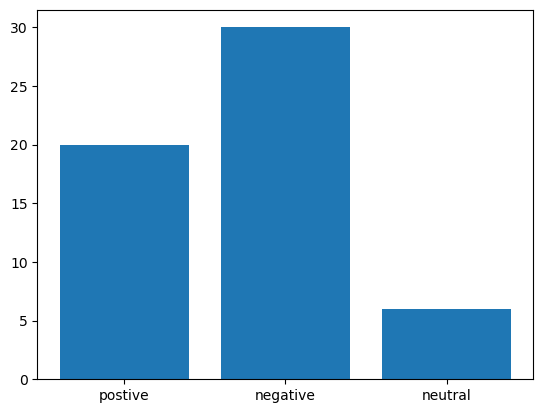

In [29]:
x = ("postive","negative","neutral")
y = (20 , 30 , 6)
plt.bar(x,y)

(array([25.,  0.,  0.,  0.,  0., 38.,  0.,  0.,  0.,  6.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

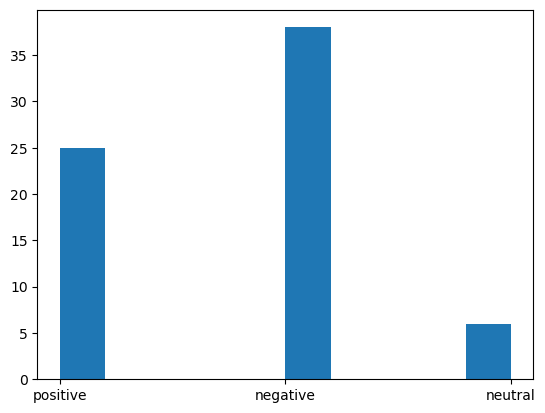

In [30]:
plt.hist(sentiment_results)

In [31]:
import json

In [32]:
with open('/Users/lubna/Documents/TKH_Labs/review-process/data/raw/reviews.json') as j_object:
    file_data = json.load(j_object)

In [33]:
print(file_data)

{'date': '2023-10-01', 'id': 'review-1234', 'source': 'customer-reviews', 'product': 'Zico Coconut Water', 'results': ['Must admit the taste of O.N.E. coconut water is better.  Took a long time to get through the supply of coconut water.', "I love this stuff!  Perfect blend of dark choc and coconut water.  I really like how smooth and refreshing this stuff is.  I am lactose intolerant so I can't drink choc milk but I think this stuff comes really close and it is better for you than cow's milk.  I look forward to buying case after case (=.", 'I am from the Philippines, a country where there is an abundance of coconuts. I miss drinking coconut water which is something that you can easily get in my country by buying fresh coconut. So, I decided to try this product hoping to get the same satisfying taste that one would get from fresh coconut water. It turned out to be a disappointment. I do not doubt that this is indeed pure coconut water but it does have a sort of artificial flavor and sm

In [34]:
file_data['results']

['Must admit the taste of O.N.E. coconut water is better.  Took a long time to get through the supply of coconut water.',
 "I love this stuff!  Perfect blend of dark choc and coconut water.  I really like how smooth and refreshing this stuff is.  I am lactose intolerant so I can't drink choc milk but I think this stuff comes really close and it is better for you than cow's milk.  I look forward to buying case after case (=.",
 'I am from the Philippines, a country where there is an abundance of coconuts. I miss drinking coconut water which is something that you can easily get in my country by buying fresh coconut. So, I decided to try this product hoping to get the same satisfying taste that one would get from fresh coconut water. It turned out to be a disappointment. I do not doubt that this is indeed pure coconut water but it does have a sort of artificial flavor and smell to it. It might be just due to the plastic bottle itself.',
 'I recently started researching the benefits of dri

In [35]:
get_sentiment(file_data['results'])

['neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral']

In [ ]:
 final_result= get_sentiment(file_data['results'])

In [55]:
def make_plot(sentiments: list) -> list:
    """
    Function to plot how frequent different sentiment occurs.
    Args : list of sentiments. eg, ['positive','negative','neutral']
    Return : list of each sentiment occured. eg,[30,9,0]

    """
    pos = 0
    neg = 0
    neu = 0
    irr = 0

    for items in sentiments:
        if items == "positive":
            pos += 1
        elif items == 'negative':
            neg += 1
        elif items == 'neutral':
            neu += 1
        else:
            irr += 1
    return [pos,neg,neu,irr]

In [37]:
#make_plot(final_result)

In [38]:
ratio = make_plot(final_result)

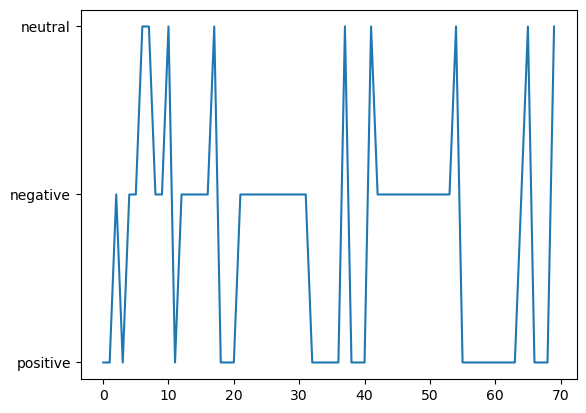

In [52]:
plt.plot(final_result)

In [53]:
plt.bar(final_result)

TypeError: bar() missing 1 required positional argument: 'height'

(array([27.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  9.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

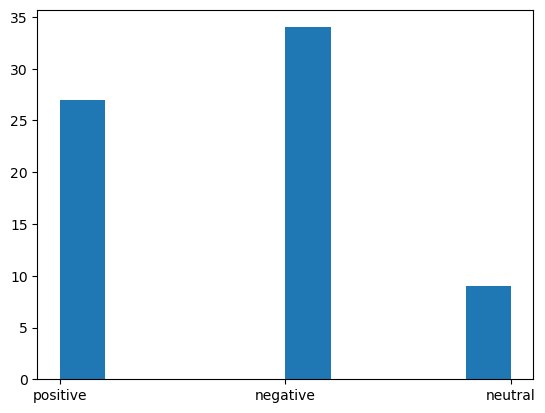

In [56]:
plt.hist(final_result)

In [59]:
make_plot(get_sentiment(sentiment_results))

[25, 38, 6, 0]

(array([1., 1., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

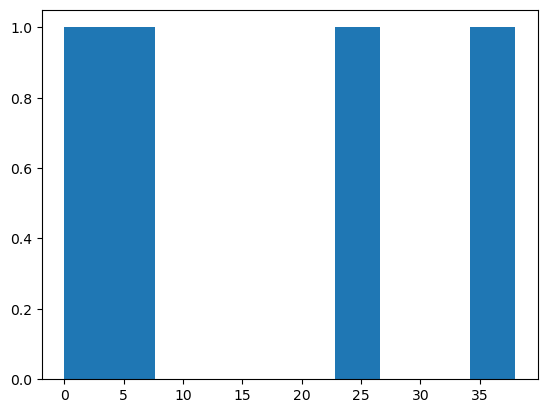

In [60]:
plt.hist(make_plot(get_sentiment(sentiment_results)))

In [62]:
#sentiment_results

In [63]:
plt.bar(make_plot(get_sentiment(sentiment_results)))

TypeError: bar() missing 1 required positional argument: 'height'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (69,).

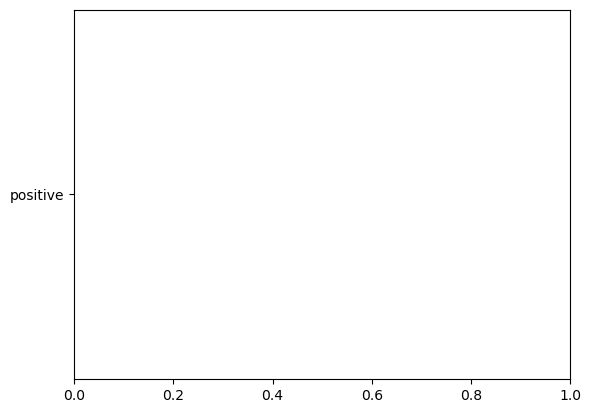

In [66]:
plt.bar(make_plot(get_sentiment(sentiment_results)),get_sentiment(sentiment_results))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (69,) and arg 1 with shape (4,).

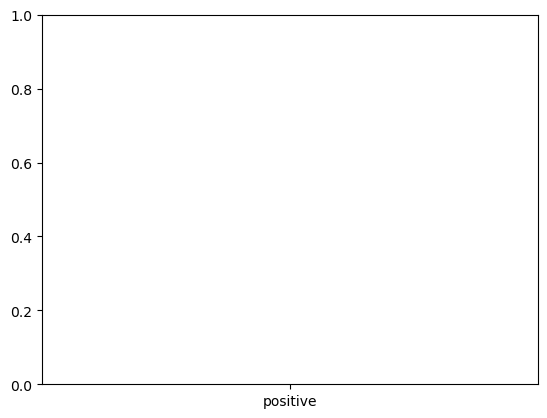

In [69]:
#plt.bar(make_plot(get_sentiment(sentiment_results)),get_sentiment(sentiment_results))
plt.bar(get_sentiment(sentiment_results),make_plot(sentiment_results))

In [70]:
get_sentiment(sentiment_results)

['positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive']

In [71]:
make_plot(sentiment_results)

[25, 38, 6, 0]

In [73]:
x = get_sentiment(sentiment_results)
y = make_plot(sentiment_results)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (69,) and arg 1 with shape (4,).

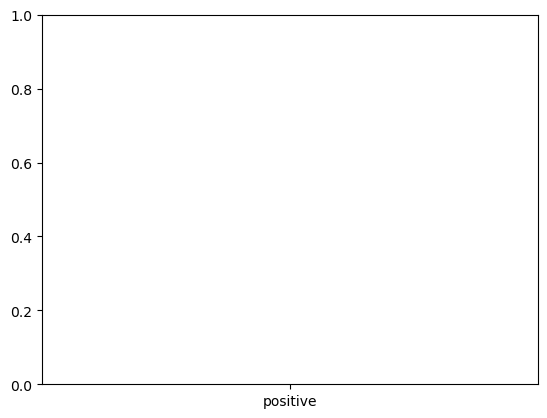

In [74]:
plt.bar(x,y)

(array([27.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  9.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

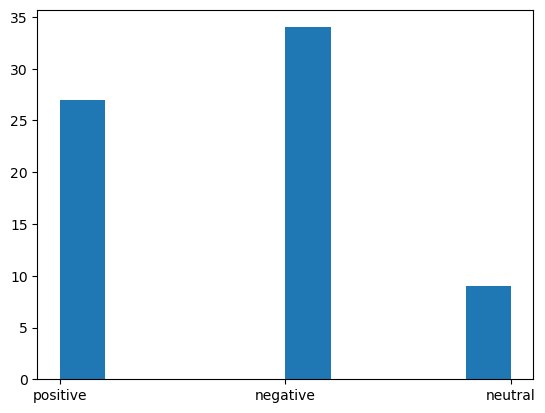

In [77]:
plt.hist(final_result)

In [79]:
final_result

['positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral']